In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os.path
import datetime

In [15]:
extracted_information = pd.read_csv(os.path.join('..','Extracted_Information.csv'))
# select the Education entries and drop values without a valid currency or loan amound
with_valid_info = extracted_information.dropna(subset=['Amount_in_usd'])
with_valid_info['Year'] = with_valid_info['Date'].apply(lambda x: x[0:4])
print(len(with_valid_info))
with_valid_info.head()

2956


<ipython-input-15-88b6f9a3e9be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_valid_info['Year'] = with_valid_info['Date'].apply(lambda x: x[0:4])


,Unnamed: 0,filename,Project_desc,Date,Project_name,Currency,Amount_loan,Amount_in_usd,Country_code,Address,Country3code,Country_name,Income_level,Region,GDP_historic,Stemmed,Topic,Year
0,0,1990_april_24_587321468019152780_conformed-cop...,Description of the Project The objectives of t...,1990-04-24 00:00:00,forestry sector project,$,80000000.0,80000000.0,IVC,"\n\nministry of economy, finance and budget\np...",CIV,Cote d'Ivoire,Lower middle income,Sub-Saharan Africa (excluding high income),1.079585e+10,forestri sector project descript project objec...,Agriculture,1990
1,1,1990_april_24_668811468165272290_conformed-cop...,NaN,1990-04-24 00:00:00,water supply project,$,2500000.0,2500000.0,SLU,"\n\n ministry of planning, personnel,\n est...",LCA,St. Lucia,Upper middle income,Latin America & Caribbean (excluding high income),5.796296e+08,water suppli project,Water Works,1990
2,2,1990_april_25_904191468298750561_conformed-cop...,Description of the Project The objectives of t...,1990-04-25 00:00:00,environment management project,$,18000000.0,18000000.0,POL,"\n\n ministry of environmental protection,\n ...",POL,Poland,High income,NaN,6.597775e+10,environ manag project descript project object ...,Other,1990
3,3,1990_april_30_410811468040573756_conformed-cop...,Description of the Project The objective of th...,1990-04-30 00:00:00,rural electrification project,$,329000000.0,329000000.0,IND,\n\n ministry of finance\n c/o directorate...,IDN,Indonesia,Upper middle income,East Asia & Pacific (excluding high income),1.061407e+11,rural electrif project descript project object...,Rural Development,1990
4,4,1990_april_30_725911468042268845_conformed-cop...,Description of the Project The objectives of t...,1990-04-30 00:00:00,third telecommunications project,$,350000000.0,350000000.0,IND,\n\n ministry of finance\n c/o director ge...,IDN,Indonesia,Upper middle income,East Asia & Pacific (excluding high income),1.061407e+11,third telecommun project descript project obje...,Other,1990


No handles with labels found to put in legend.


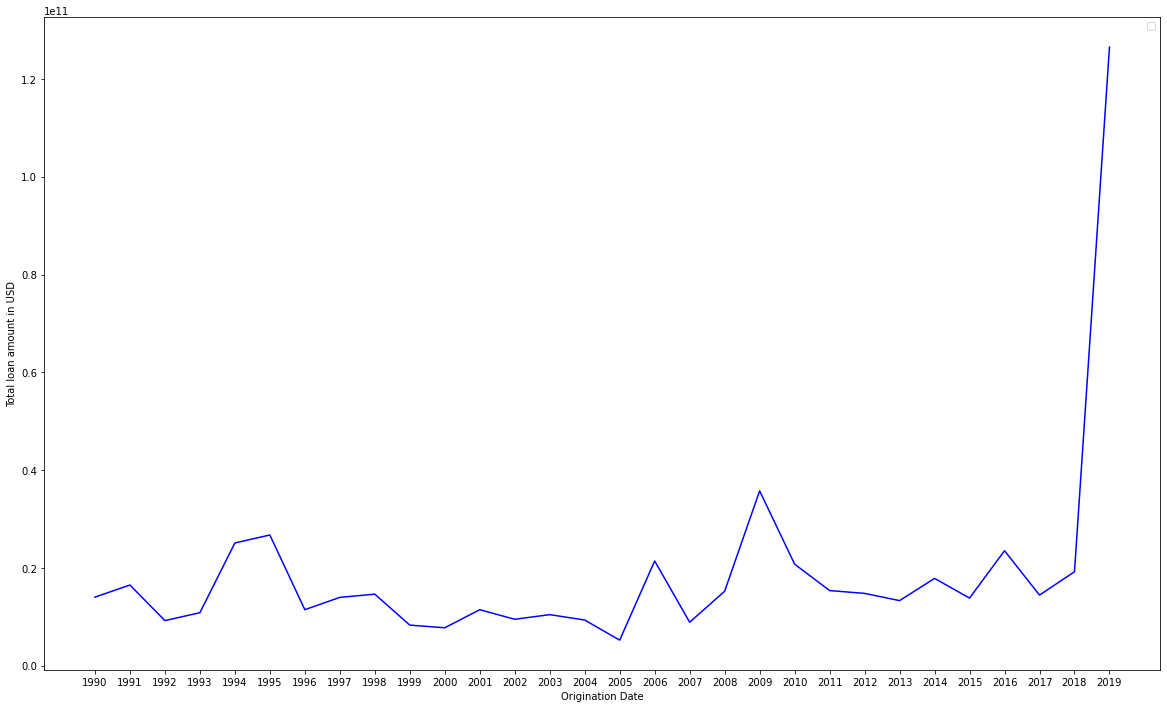

In [21]:
# Multiple entries have the same day so we'll aggregate them
year_aggregated = with_valid_info[['Year','Amount_loan']].groupby('Year').sum()
year_aggregated.head()

plt.figure(figsize=(20,12))
plt.plot(year_aggregated.index,year_aggregated['Amount_loan'],'b-')

#plt.plot(education_aggregated['Date'],smoothed_fit.fittedvalues,'r--',label="Smoothed trend, smoothing factor "+str(smoothed_fit.params['smoothing_level']))

plt.xlabel('Origination Date')
plt.ylabel('Total loan amount in USD')
plt.yscale('linear')
plt.legend()
to_save = plt.gcf()
plt.show()



In [22]:
to_save.savefig('total_loan_so_far.png')

As for education as a percentage of total, we'll group by year as a proof-of-concept.

<ipython-input-52-c8a1151b947a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_valid['year'] = extracted_valid['Date'].apply(lambda x: x.year)


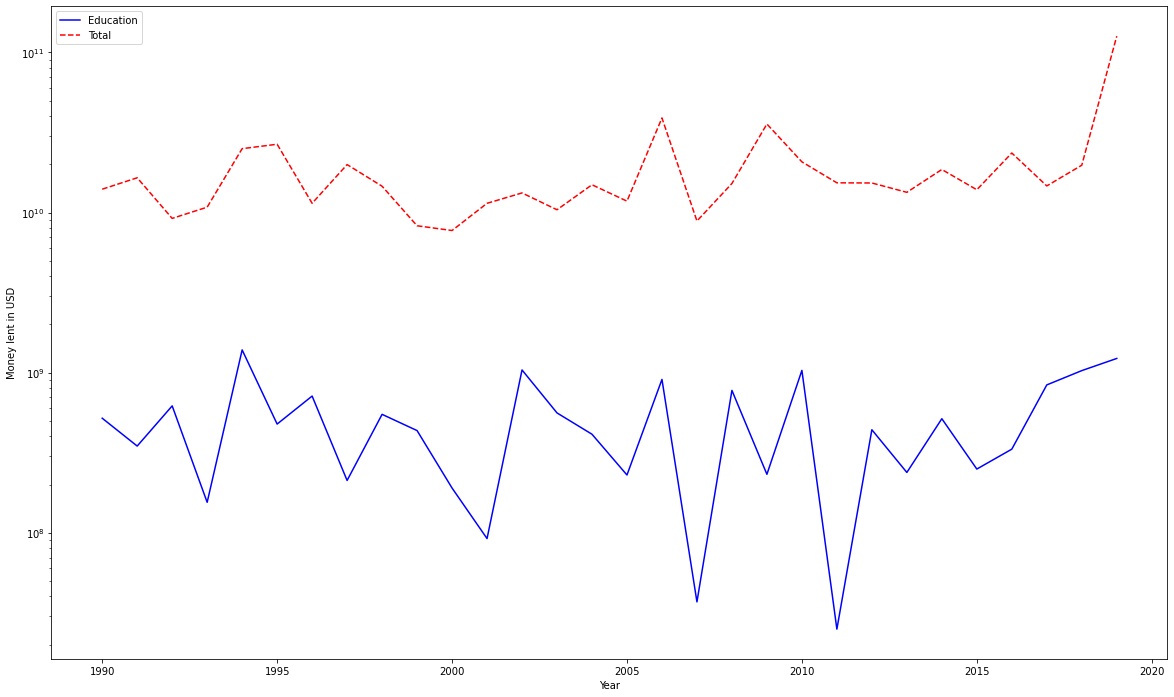

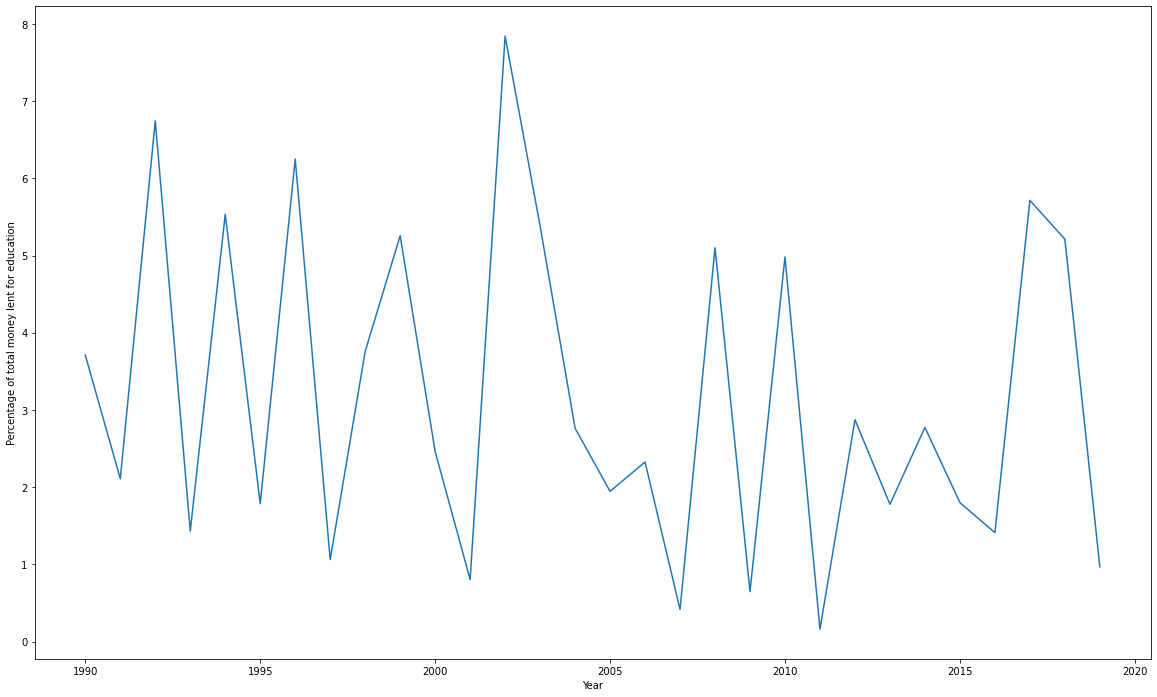

In [52]:
extracted_valid = extracted_information.dropna(subset=['Currency','Amount_loan'])
extracted_valid['year'] = extracted_valid['Date'].apply(lambda x: x.year)
extracted_valid_usd = extracted_valid.loc[(extracted_valid['Currency']=='$') | (extracted_valid['Currency']=='usd')]
education_by_year = extracted_valid[extracted_valid['Project_Sector']=='Education'].groupby('year')['Amount_loan'].sum()
total_by_year = extracted_valid.groupby('year')['Amount_loan'].sum()


plt.figure(figsize=(20,12))
plt.plot(education_by_year.index,education_by_year.values,'b-',label="Education")

plt.plot(total_by_year.index,total_by_year.values,'r--',label="Total")

plt.xlabel('Year')
plt.ylabel('Money lent in USD')
plt.yscale('log')
plt.legend()
ed_vs_total = plt.gcf()
plt.show()

# as percentage of total
pct = education_by_year / total_by_year * 100

plt.figure(figsize=(20,12))
plt.plot(pct.index,pct.values)

plt.xlabel('Year')
plt.ylabel('Percentage of total money lent for education')
pct_ed = plt.gcf()
plt.show()

In [53]:
ed_vs_total.savefig('education_vs_total.svg')
pct_ed.savefig('education_as_percentage.svg')